In [91]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
df = pd.read_excel('CustomerChurn.xlsx')

 Task 1: EDA And cleaning


In [93]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,0,0,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,0,0,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,Month-to-month,No,Mailed check,29.75,301.9,0,0,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,0,2,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0,0,No


In [94]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
numAdminTickets     0
numTechTickets      0
Churn               0
dtype: int64

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [96]:
df.shape

(7043, 23)

In [97]:
print(df['TotalCharges'].dtype)
df['TotalCharges'].unique()
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(df['TotalCharges'].dtype)
df.isnull().sum()

object
float64


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
numAdminTickets      0
numTechTickets       0
Churn                0
dtype: int64

In [98]:
missing_datavalues = df.isnull().sum()
print(missing_datavalues)
missing_percent_of_datavalues =(missing_datavalues / len(df)) * 100
print(missing_percent_of_datavalues)

missing_summary = pd.DataFrame({
    "missing_values": missing_datavalues,
    "percent(%)": missing_percent_of_datavalues.round(2)
})

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
numAdminTickets      0
numTechTickets       0
Churn                0
dtype: int64
customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.0

In [99]:
print(missing_summary[missing_summary["missing_values"] > 0])

              missing_values  percent(%)
TotalCharges              11        0.16


In [100]:
df = df.dropna(subset=['TotalCharges'])

In [101]:
missing_data = df.isnull().sum()
missing_summary_after = pd.DataFrame({
    "missing_values": missing_data,
    "percent(%)": (missing_data / len(df)) * 100
})

In [102]:
print(missing_data)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
numAdminTickets     0
numTechTickets      0
Churn               0
dtype: int64


#### Data Visualization:

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Churn Distribution')

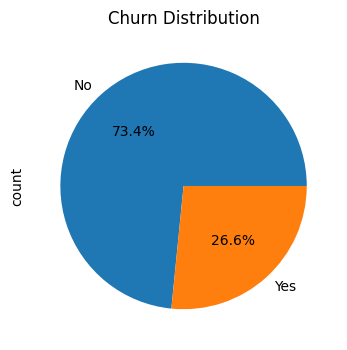

In [104]:
plt.figure(figsize=(6,4))
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Churn Distribution')

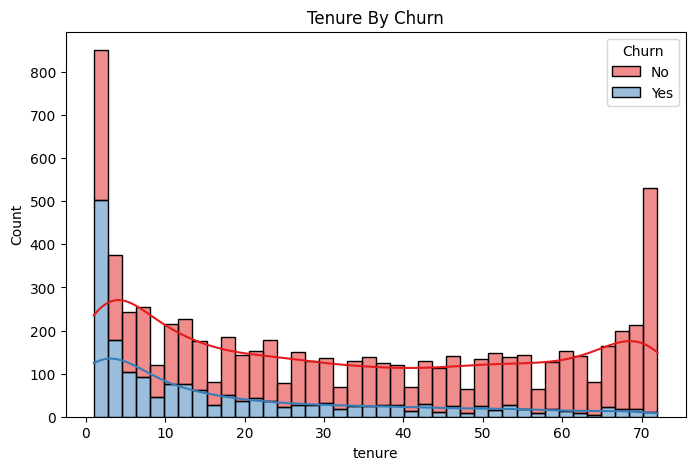

In [105]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="tenure", hue="Churn", bins=40, kde=True, multiple="stack", palette="Set1")
plt.title("Tenure By Churn")
plt.show()


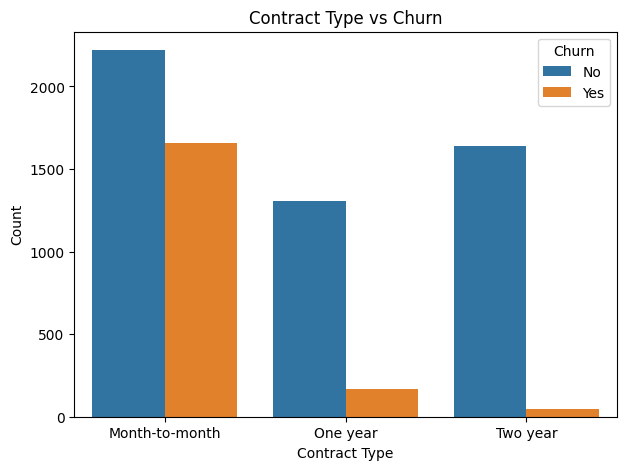

In [106]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="Contract", hue="Churn")
plt.title("Contract Type vs Churn")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.show()

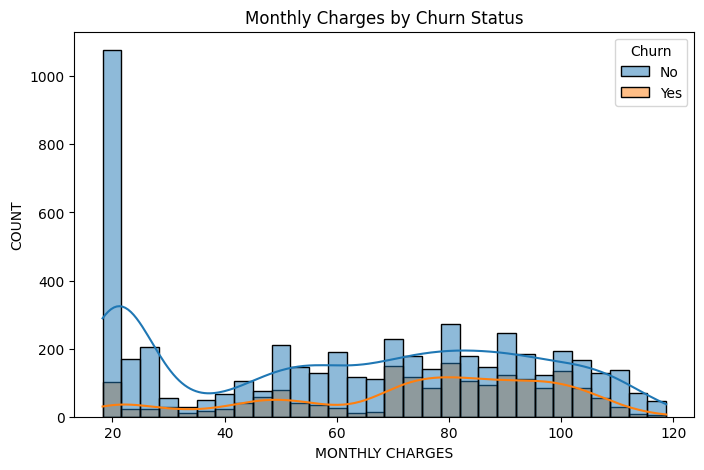

In [107]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="MonthlyCharges", hue="Churn", kde=True, bins=30)
plt.title("Monthly Charges by Churn Status")
plt.ylabel("COUNT")
plt.xlabel("MONTHLY CHARGES")
plt.show()

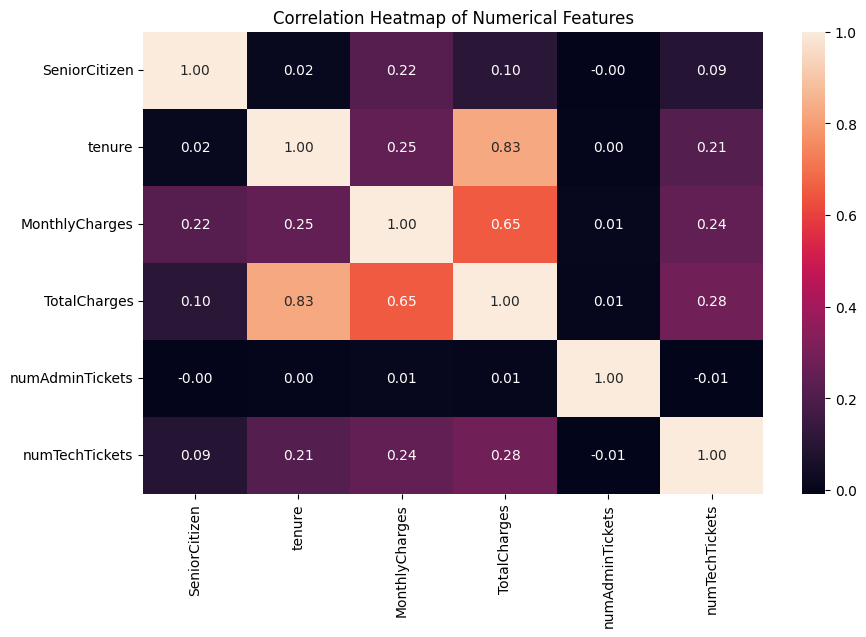

In [108]:
plt.figure(figsize=(10,6))
df_corr = df.corr(numeric_only=True)
sns.heatmap(df_corr, annot=True, fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [109]:
X = df.drop(columns=['Churn'])  
X = X.select_dtypes(include=['float64', 'int64'])  

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

 Task 2: Feature Engineering

In [111]:
df['TenureGrp'] = pd.cut(df['tenure'],
                           bins=[0, 12, 24, 48, 72],
                           labels=['0-1 yr', '1-2 yrs', '2-4 yrs', '4-6 yrs'])
# here we are dividing the tenure in terms of group as an ordinal relation can be established

In [112]:
df['AvgMonthlyTicket'] = np.where(df['tenure'] > 0,
                                   (df['numAdminTickets'] + df['numTechTickets']) / df['tenure'],
                                   0).round(4)
# how a often an coustommer raised ticket per month

In [113]:
print(df[['tenure', 'TenureGrp', 'AvgMonthlyTicket']].head())

   tenure TenureGrp  AvgMonthlyTicket
0       1    0-1 yr            0.0000
1      34   2-4 yrs            0.0000
2       2    0-1 yr            0.0000
3      45   2-4 yrs            0.0667
4       2    0-1 yr            0.0000


#### df.head()

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   gender            7032 non-null   object  
 2   SeniorCitizen     7032 non-null   int64   
 3   Partner           7032 non-null   object  
 4   Dependents        7032 non-null   object  
 5   tenure            7032 non-null   int64   
 6   PhoneService      7032 non-null   object  
 7   MultipleLines     7032 non-null   object  
 8   InternetService   7032 non-null   object  
 9   OnlineSecurity    7032 non-null   object  
 10  OnlineBackup      7032 non-null   object  
 11  DeviceProtection  7032 non-null   object  
 12  TechSupport       7032 non-null   object  
 13  StreamingTV       7032 non-null   object  
 14  StreamingMovies   7032 non-null   object  
 15  Contract          7032 non-null   object  
 16  PaperlessBilling  7032 non-nu

### Task 3: Building the End-to-End Pipeline

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
X = df.drop(columns=['Churn', 'customerID', 'TotalCharges'])
y = df['Churn'].map({'Yes': 1, 'No': 0}) 

In [116]:
num_features = X.select_dtypes(include=[np.number]).columns.tolist()
cat_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numeric:", num_features)
print("Categorical:", cat_features)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000,class_weight="balanced"))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

Numeric: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'numAdminTickets', 'numTechTickets', 'AvgMonthlyTicket']
Categorical: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TenureGrp']


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'numAdminTickets',
                                                   'numTechTickets',
                                                   'AvgMonthlyTicket']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   One...coder(handle_unknown='ignore'))]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod',
                                                   'TenureGrp'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [117]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Logistic Regression Performance:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=["No Churn", "Churn"]))

Logistic Regression Performance:
Accuracy : 0.8188
Precision: 0.6121
Recall   : 0.8690

Detailed Classification Report:
              precision    recall  f1-score   support

    No Churn       0.94      0.80      0.87      1033
       Churn       0.61      0.87      0.72       374

    accuracy                           0.82      1407
   macro avg       0.78      0.83      0.79      1407
weighted avg       0.86      0.82      0.83      1407



### Task 4: Model Selection and Hyperparameter Tuning

In [118]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

MODELS = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

for name, clf in MODELS.items():
    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", clf)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"{name}:F1-weighted:{f1:.3f}")

Logistic Regression:F1-weighted:0.848
Random Forest:F1-weighted:0.843
Gradient Boosting:F1-weighted:0.850


#### Hyperparameter Tuning

In [119]:
parameter_grid = {
    "classifier__n_estimators": [100, 200],
    "classifier__learning_rate": [0.01, 0.1],
    "classifier__max_depth": [5, 7]
}

gb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", GradientBoostingClassifier(random_state=42))
])

grid_search_gb = GridSearchCV(
    estimator=gb_pipeline,
    param_grid=parameter_grid,
    scoring="f1_weighted",
    cv=3,
    n_jobs=-1
)

grid_search_gb.fit(X_train, y_train)

print("best_parameters_for_Gradient_Boosting:", grid_search_gb.best_params_)
print("Best_CV_F1-weighted:", grid_search_gb.best_score_)

y_pred_gb = grid_search_gb.predict(X_test)
from sklearn.metrics import f1_score
print("Test_F1-weighted:", f1_score(y_test, y_pred_gb, average="weighted"))

from sklearn.metrics import classification_report
print("\nReport on Test Data:")
print(classification_report(y_test, y_pred_gb, target_names=["No Churn", "Churn"]))


best_parameters_for_Gradient_Boosting: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 5, 'classifier__n_estimators': 200}
Best_CV_F1-weighted: 0.8569249769031847
Test_F1-weighted: 0.8518723876235798

Report on Test Data:
              precision    recall  f1-score   support

    No Churn       0.88      0.93      0.91      1033
       Churn       0.78      0.64      0.70       374

    accuracy                           0.86      1407
   macro avg       0.83      0.79      0.80      1407
weighted avg       0.85      0.86      0.85      1407



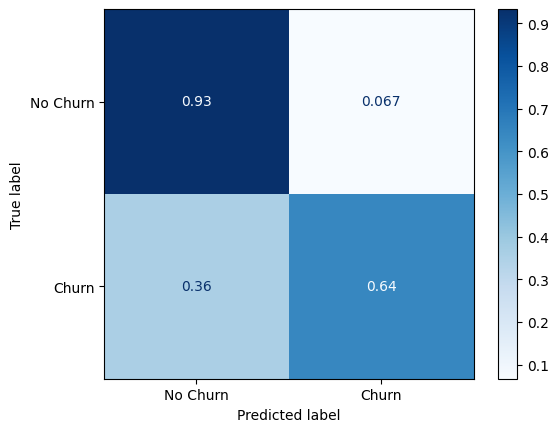

In [120]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(grid_search_gb, X_test, y_test, display_labels=["No Churn", "Churn"], cmap=plt.cm.Blues, normalize='true')
plt.show()


<h3>Task 5: Handling Class Imbalance</h3>

In [121]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

smote_pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("classifier", GradientBoostingClassifier(random_state=42))
])

smote_pipeline.fit(X_train, y_train)

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_res, y_res = smote_pipeline.named_steps["smote"].fit_resample(X_train_preprocessed, y_train)
print("\n Rows added by SMOTE (for oversampling)")
print("Before SMOTE:", X_train.shape[0], "rows")
print("After SMOTE:", X_res.shape[0], "rows")
print("Rows added:", X_res.shape[0] - X_train.shape[0])

print("\n === Without SMOTE ===")
print(classification_report(y_test, y_pred_gb, target_names=["No Churn", "Churn"]))
print("Test F1-weighted:", f1_score(y_test, y_pred_gb, average="weighted"))

y_pred_smote = smote_pipeline.predict(X_test)

print("\n=== With SMOTE ===")
print(classification_report(y_test, y_pred_smote, target_names=["No Churn", "Churn"]))

print("F1-weighted with SMOTE:",
      f1_score(y_test, y_pred_smote, average="weighted"))



 Rows added by SMOTE (for oversampling)
Before SMOTE: 5625 rows
After SMOTE: 8260 rows
Rows added: 2635

 === Without SMOTE ===
              precision    recall  f1-score   support

    No Churn       0.88      0.93      0.91      1033
       Churn       0.78      0.64      0.70       374

    accuracy                           0.86      1407
   macro avg       0.83      0.79      0.80      1407
weighted avg       0.85      0.86      0.85      1407

Test F1-weighted: 0.8518723876235798

=== With SMOTE ===
              precision    recall  f1-score   support

    No Churn       0.92      0.86      0.89      1033
       Churn       0.67      0.79      0.72       374

    accuracy                           0.84      1407
   macro avg       0.79      0.82      0.80      1407
weighted avg       0.85      0.84      0.84      1407

F1-weighted with SMOTE: 0.8426894434014872


<h3> Task 6: Final Evaluation and Interpretation</h3>

In [122]:
from sklearn.metrics import roc_auc_score, confusion_matrix
y_pred_final = smote_pipeline.predict(X_test) 
y_proba_final = smote_pipeline.predict_proba(X_test)[:, 1]

precision = precision_score(y_test, y_pred_final)
recall = recall_score(y_test, y_pred_final)
f1 = f1_score(y_test, y_pred_final)
roc_auc = roc_auc_score(y_test, y_proba_final)

print("Final_Performance_on_Test_Set:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC_AUC: {roc_auc:.4f}")

Final_Performance_on_Test_Set:
Precision: 0.6659
Recall: 0.7888
F1-Score: 0.7222
ROC_AUC: 0.9157



Classification_Report:
              precision    recall  f1-score   support

    No Churn       0.92      0.86      0.89      1033
       Churn       0.67      0.79      0.72       374

    accuracy                           0.84      1407
   macro avg       0.79      0.82      0.80      1407
weighted avg       0.85      0.84      0.84      1407

F1_weighted: 0.8426894434014872


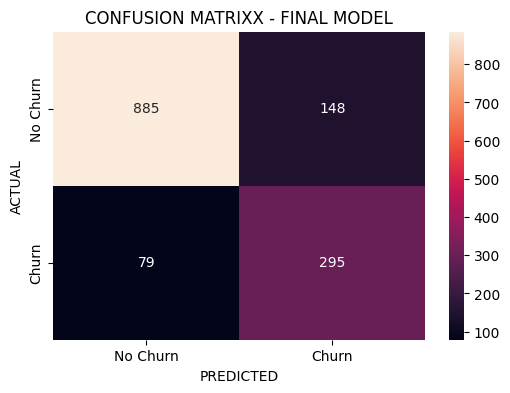

In [123]:
print("\nClassification_Report:")
print(classification_report(y_test, y_pred_final, target_names=["No Churn", "Churn"]))
print("F1_weighted:", f1_score(y_test, y_pred_smote, average="weighted"))
#creating a confusion matrix
cm = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("PREDICTED")
plt.title("CONFUSION MATRIXX - FINAL MODEL")
plt.ylabel("ACTUAL")
plt.show()

<h4> Analyze the confusion matrix. In the context of customer churn, what is the business cost of a False Positive versus a False Negative? Which one is worse?</h4>
<ul>


<li>The heatmap shows strong performance with 887 true negatives and 292 true positives, indicating the model excels at predicting "No Churn" and reasonably identifies "Churn" cases.</li>
<li>It has a higher recall (78.1%) for "Churn," meaning it captures most actual churners, but precision (66.7%) is lower   due to 146 false positives.</li>
<li>The overall accuracy (83.8%) is solid, though influenced by the class imbalance, with potential for improvement by    addressing false positives.,<li>
</ul>

<h3>If your final model was a tree-based ensemble (like Random Forest or Gradient Boosting), extract and visualize the top 10 most important features. Discuss what these features tell you about the main drivers of customer churn.</h3>

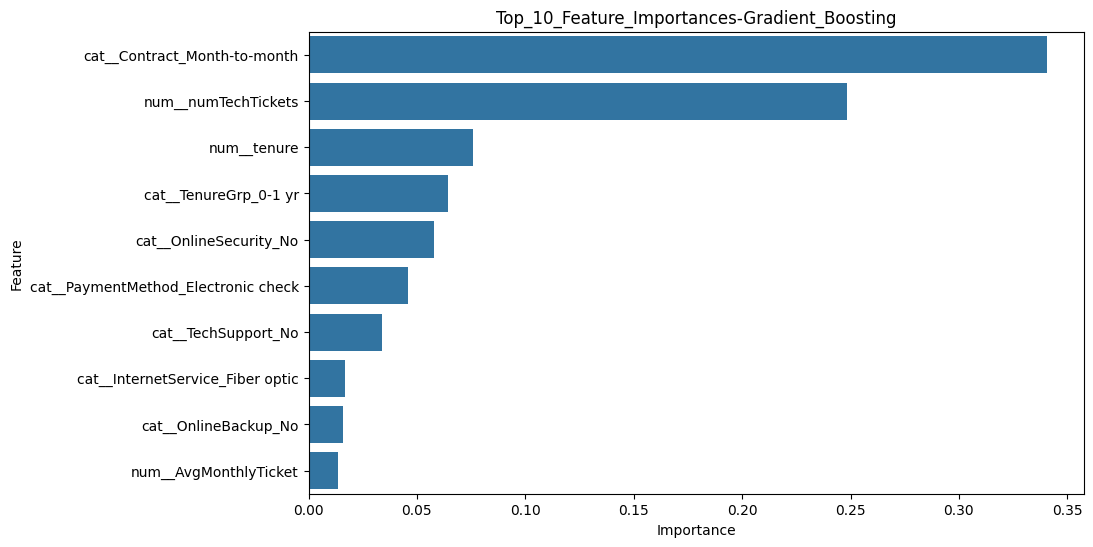

In [124]:
preprocessor = smote_pipeline.named_steps['preprocessor']
gb_model = smote_pipeline.named_steps['classifier']
feature_names = preprocessor.get_feature_names_out()
feature_imp = pd.DataFrame({
    'feature': feature_names,
    'importance': gb_model.feature_importances_
})

top_features =feature_imp.sort_values(by='importance', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='importance',y='feature',data=top_features)
plt.title('Top_10_Feature_Importances-Gradient_Boosting')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [125]:
print("Top_10 features")
for i, feature in enumerate(top_features['feature'], 1):
    print(f"{i}. {feature}")

Top_10 features
1. cat__Contract_Month-to-month
2. num__numTechTickets
3. num__tenure
4. cat__TenureGrp_0-1 yr
5. cat__OnlineSecurity_No
6. cat__PaymentMethod_Electronic check
7. cat__TechSupport_No
8. cat__InternetService_Fiber optic
9. cat__OnlineBackup_No
10. num__AvgMonthlyTicket


Customer churn is mainly driven by how long they’ve been with the company, their contract type, and the services they use.
Customers with short tenure or month-to-month contracts are more likely to leave due to lower loyalty.
Frequent technical issues and lack of add-on services (like Online Security or Tech Support) increase churn risk.
Payment methods (e.g., electronic checks) and fiber-optic internet use can signal potential churners.
Focusing on better support, offering add-on services, and promoting longer contracts can help retain customers.